# Clustering and Dimension Reduction


## i. Introduction
Nama : Darmawan Wijaya </br>
Kelas : FTDS - 002 </br>
Obyektif : Mengaplikasikan konsep clustering untuk melakukan segmentasi pengguna kartu kredit

## ii. Import Pustaka
Pustaka yang digunakan pada proyek ini adalah:</br>
1. Numpy
2. Pandas
3. Scikit Learn
4. Matplotlib

In [64]:
#Proses import dari pustaka yang digunakan
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Kode tambahan untuk menampilkan angka desimal maksimal 5 angka dibelakang koma sehingga angka lebih mudah dipahami
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

## iii. Data Loading
Data yang digunakan adalah data penggunaan kartu kredit dari 9000 active credit card selama 6 bulan terakhir yang berisi: </br>
1. Customer ID
2. Balance
3. Purchases    
5. Credit Limit
6. Payments
7. Tenure
8. Dan parameter-parameter lainnya</br>

Data tersebut dapat diunduh pada : https://www.kaggle.com/arjunbhasin2013/ccdata


In [66]:
df = pd.read_csv("CC GENERAL.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

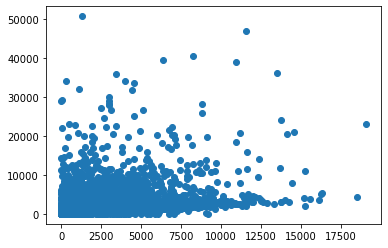

In [67]:
plt.scatter(df['BALANCE'],df['PAYMENTS'])
plt.show()

In [68]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90075,0.81818,95.40000,0.00000,95.40000,0.00000,0.16667,0.00000,0.08333,0.00000,0,2,1000.00000,201.80208,139.50979,0.00000,12
1,C10002,3202.46742,0.90909,0.00000,0.00000,0.00000,6442.94548,0.00000,0.00000,0.00000,0.25000,4,0,7000.00000,4103.03260,1072.34022,0.22222,12
2,C10003,2495.14886,1.00000,773.17000,773.17000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0,12,7500.00000,622.06674,627.28479,0.00000,12
3,C10004,1666.67054,0.63636,1499.00000,1499.00000,0.00000,205.78802,0.08333,0.08333,0.00000,0.08333,1,1,7500.00000,0.00000,NaN,0.00000,12
4,C10005,817.71434,1.00000,16.00000,16.00000,0.00000,0.00000,0.08333,0.08333,0.00000,0.00000,0,1,1200.00000,678.33476,244.79124,0.00000,12


## iv. Data Cleaning
Data cleaning adalah proses penyiapan data sebelum dilakukan eksplorasi dan pengolahan data lebih lanjut. </br>
Proses data cleaning yang digunakan pada proyek ini adalah: </br>
1. Pengecekan Data Duplikat
2. Pengecekan Missing Values

In [69]:
#Proses Pengecekan Data Duplikat
duplicate = df[df.duplicated()]
duplicate

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


In [70]:
#Pengecekan data missing values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing value pada credit limit dan minimum payment. </br>
Untuk missing value credit limit dan minimum payment tersebut akan kami lakukan imputasi berdasarkan nilai median.

In [71]:
df_cleaned = df.copy()

In [72]:
df_cleaned.fillna(df_cleaned.median(), inplace=True)

In [73]:
df_cleaned.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [74]:
df_cleaned.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000
mean,1564.47483,0.87727,1003.20483,592.43737,411.06764,978.87111,0.49035,0.20246,0.36444,0.13514,3.24883,14.70983,4494.28247,1733.14385,844.90677,0.15371,11.51732
std,2081.53188,0.23690,2136.63478,1659.88792,904.33812,2097.16388,0.40137,0.29834,0.39745,0.20012,6.82465,24.85765,3638.64670,2895.06376,2332.79232,0.29250,1.33833
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,50.00000,0.00000,0.01916,0.00000,6.00000
25%,128.28192,0.88889,39.63500,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,1.00000,1600.00000,383.27617,170.85765,0.00000,12.00000
50%,873.38523,1.00000,361.28000,38.00000,89.00000,0.00000,0.50000,0.08333,0.16667,0.00000,0.00000,7.00000,3000.00000,856.90155,312.34395,0.00000,12.00000
75%,2054.14004,1.00000,1110.13000,577.40500,468.63750,1113.82114,0.91667,0.30000,0.75000,0.22222,4.00000,17.00000,6500.00000,1901.13432,788.71350,0.14286,12.00000
max,19043.13856,1.00000,49039.57000,40761.25000,22500.00000,47137.21176,1.00000,1.00000,1.00000,1.50000,123.00000,358.00000,30000.00000,50721.48336,76406.20752,1.00000,12.00000


In [75]:
df_cleaned.drop(columns=['CUST_ID'], inplace=True)


In [76]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## v. Data Exploration
Kami akan melakukan eksplorasi data terhadap kolom balance dan purchasing

In [77]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

Dari informasi diatas, didapatkan bahwa untuk kesemua variabel memiliki tipe data numerik.</br>
Sehingga untuk proses clustering, tidak perlu ada data kategorikal yang dihilangkan

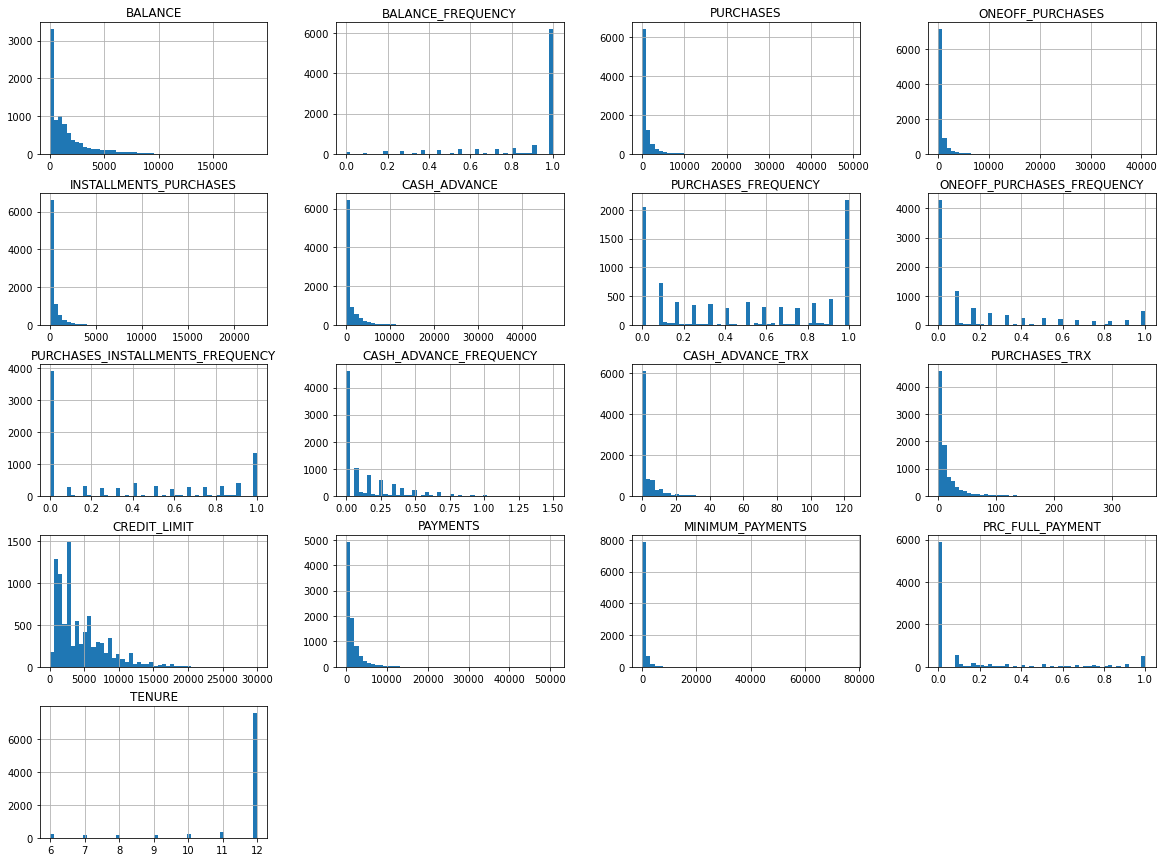

In [78]:
df_cleaned.hist(bins=50, figsize=(20,15))
plt.show()

In [79]:
df_cleaned.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000,8950.00000
mean,1564.47483,0.87727,1003.20483,592.43737,411.06764,978.87111,0.49035,0.20246,0.36444,0.13514,3.24883,14.70983,4494.28247,1733.14385,844.90677,0.15371,11.51732
std,2081.53188,0.23690,2136.63478,1659.88792,904.33812,2097.16388,0.40137,0.29834,0.39745,0.20012,6.82465,24.85765,3638.64670,2895.06376,2332.79232,0.29250,1.33833
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,50.00000,0.00000,0.01916,0.00000,6.00000
25%,128.28192,0.88889,39.63500,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,1.00000,1600.00000,383.27617,170.85765,0.00000,12.00000
50%,873.38523,1.00000,361.28000,38.00000,89.00000,0.00000,0.50000,0.08333,0.16667,0.00000,0.00000,7.00000,3000.00000,856.90155,312.34395,0.00000,12.00000
75%,2054.14004,1.00000,1110.13000,577.40500,468.63750,1113.82114,0.91667,0.30000,0.75000,0.22222,4.00000,17.00000,6500.00000,1901.13432,788.71350,0.14286,12.00000
max,19043.13856,1.00000,49039.57000,40761.25000,22500.00000,47137.21176,1.00000,1.00000,1.00000,1.50000,123.00000,358.00000,30000.00000,50721.48336,76406.20752,1.00000,12.00000


In [80]:
#Pengecekan korelasi
df_cleaned.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.00000,0.32241,0.18126,0.16435,0.12647,0.49669,-0.07794,0.07317,-0.06319,0.44922,0.38515,0.15434,0.53130,0.32280,0.39792,-0.31896,0.07269
BALANCE_FREQUENCY,0.32241,1.00000,0.13367,0.10432,0.12429,0.09939,0.22972,0.20242,0.17608,0.19187,0.14155,0.18963,0.09593,0.06501,0.13118,-0.09508,0.11978
PURCHASES,0.18126,0.13367,1.00000,0.91684,0.67990,-0.05147,0.39302,0.49843,0.31557,-0.12014,-0.06718,0.68956,0.35698,0.60326,0.09579,0.18038,0.08629
ONEOFF_PURCHASES,0.16435,0.10432,0.91684,1.00000,0.33062,-0.03133,0.26494,0.52489,0.12773,-0.08263,-0.04621,0.54552,0.31973,0.56729,0.05026,0.13276,0.06415
INSTALLMENTS_PURCHASES,0.12647,0.12429,0.67990,0.33062,1.00000,-0.06424,0.44242,0.21404,0.51135,-0.13232,-0.07400,0.62811,0.25651,0.38408,0.13402,0.18257,0.08614
CASH_ADVANCE,0.49669,0.09939,-0.05147,-0.03133,-0.06424,1.00000,-0.21551,-0.08675,-0.17707,0.62852,0.65650,-0.07585,0.30400,0.45324,0.14075,-0.15294,-0.06831
PURCHASES_FREQUENCY,-0.07794,0.22972,0.39302,0.26494,0.44242,-0.21551,1.00000,0.50134,0.86293,-0.30848,-0.20348,0.56843,0.11983,0.10346,0.00615,0.30580,0.06151
ONEOFF_PURCHASES_FREQUENCY,0.07317,0.20242,0.49843,0.52489,0.21404,-0.08675,0.50134,1.00000,0.14233,-0.11172,-0.06909,0.54487,0.29506,0.24354,-0.02731,0.15753,0.08247
PURCHASES_INSTALLMENTS_FREQUENCY,-0.06319,0.17608,0.31557,0.12773,0.51135,-0.17707,0.86293,0.14233,1.00000,-0.26296,-0.16921,0.52997,0.06079,0.08555,0.03206,0.25009,0.07328
CASH_ADVANCE_FREQUENCY,0.44922,0.19187,-0.12014,-0.08263,-0.13232,0.62852,-0.30848,-0.11172,-0.26296,1.00000,0.79956,-0.13117,0.13261,0.18319,0.10062,-0.24977,-0.13337


<AxesSubplot:>

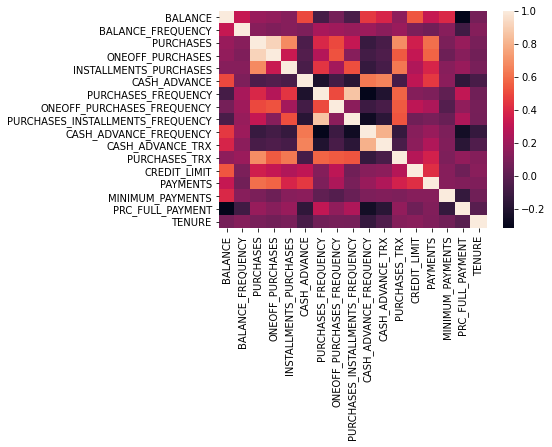

In [81]:
sns.heatmap(df_cleaned.corr())

Dari pengecekan korelasi diatas, masih terdapat variabel yang memiliki korelasi tinggi dengan variabel lainnya seperti: </br>
Purchases, Oneoff Purchases, Purchases Frequency, Purchases Installment Frequency

In [82]:
#Eksplorasi Variabel Balance
print("Mean of the BALANCE :", df_cleaned['BALANCE'].mean())
print("Median of the BALANCE :", df_cleaned['BALANCE'].median())
print("Mode of the BALANCE :", df_cleaned['BALANCE'].mode())

Mean of the BALANCE : 1564.4748276781038
Median of the BALANCE : 873.385231
Mode of the BALANCE : 0   0.00000
dtype: float64


<AxesSubplot:xlabel='BALANCE'>

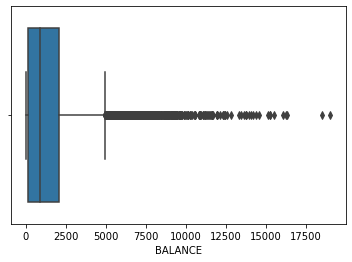

In [83]:
#Boxplot variabel Balance
sns.boxplot(x=df_cleaned['BALANCE'])

In [84]:
#Eksplorasi Variabel Purchases
print("Mean of the PURCHASES :", df_cleaned['PURCHASES'].mean())
print("Median of the PURCHASES :", df_cleaned['PURCHASES'].median())
print("Mode of the PURCHASES :", df_cleaned['PURCHASES'].mode())

Mean of the PURCHASES : 1003.2048335195564
Median of the PURCHASES : 361.28
Mode of the PURCHASES : 0   0.00000
dtype: float64


<AxesSubplot:xlabel='PURCHASES'>

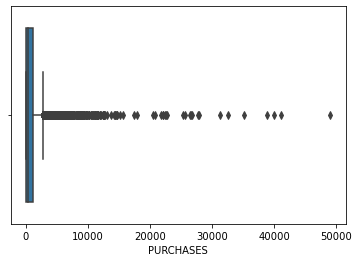

In [85]:
#Boxplot Variabel Purchases
sns.boxplot(x=df_cleaned['PURCHASES'])

Berdasarkan eksplorasi data diatas didapatkan informasi bahwa:
1. Semua variabel memiliki tipe data numerik
2. Masih terdapat korelasi yang tinggi antara beberapa variabel
3. Untuk variabel BALANCE memiliki nilai rata-rata 1564.47 dengan nilai BALANCE terbanyak adalah 0
4. Untuk variabel PURCHASES memiliki nilai rata-rata 1003.20 dengan nilai PURCHASES terbanyak adalah 0
5. Masih terdapat data outlier pada variabel BALANCE dan PURCHASES

## vi. Data Preprocessing
Proses preprosesing data yang kami lakukan adalah dengan melakukan :
1. Pengecekan Multicollinearity
2. Scaling data
3. Dimensional Reduction dengan menggunakan PCA

In [86]:
#Cek Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df_cleaned.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_cleaned.values, i) for i in range(len(df_cleaned.columns))]

vif_data

,feature,VIF
0,BALANCE,4.10871
1,BALANCE_FREQUENCY,18.10828
2,PURCHASES,58773.75143
3,ONEOFF_PURCHASES,32776.83105
4,INSTALLMENTS_PURCHASES,10399.62609
5,CASH_ADVANCE,3.46110
6,PURCHASES_FREQUENCY,26.44573
7,ONEOFF_PURCHASES_FREQUENCY,5.71273
8,PURCHASES_INSTALLMENTS_FREQUENCY,17.32986
9,CASH_ADVANCE_FREQUENCY,4.91355


- Hanya ada 9 feature yang tidak saling berkaitan dengan feature lainnya yaitu BALANCE, CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT
- Dapat diprediksi bahwa jika dilakukan reduksi dimensi, maka paling tidak dapat direduksi sampai 9 dimensi

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
dfscaled = scaler.fit_transform(df_cleaned)

In [89]:
dfscaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [90]:
pca = PCA()

In [91]:
pca_scaled = PCA(n_components=17).fit(dfscaled)

In [92]:
pca_scaled.components_

array([[ 1.01734968e-01,  1.20490410e-01,  4.11562397e-01,
         3.46334163e-01,  3.36760924e-01, -2.28098772e-02,
         3.21232166e-01,  2.94492540e-01,  2.74494280e-01,
        -8.85820623e-02, -4.81355110e-02,  3.90598721e-01,
         2.11916336e-01,  2.66481544e-01,  6.32686675e-02,
         1.31832855e-01,  8.10855965e-02],
       [ 4.03818730e-01,  1.31344137e-01,  4.00246231e-02,
         6.19177177e-02, -1.91753878e-02,  4.39026509e-01,
        -1.91148008e-01, -1.85609087e-02, -1.78868750e-01,
         4.34121168e-01,  4.19643548e-01, -2.01682139e-02,
         2.38028492e-01,  2.56715645e-01,  1.69065805e-01,
        -1.90065293e-01, -4.25523962e-03],
       [-1.61631980e-01, -4.22995451e-01,  2.57474232e-01,
         3.90899189e-01, -1.09268458e-01, -2.31280858e-02,
        -3.71394431e-01,  1.15564861e-01, -4.69578828e-01,
        -1.04709043e-01, -1.10345140e-01, -7.59293690e-02,
         1.00681745e-01,  2.77358656e-01, -2.34516638e-01,
         1.26477243e-01, -6.7

Text(0, 0.5, 'Kumulatif Explained Variance Ratio')

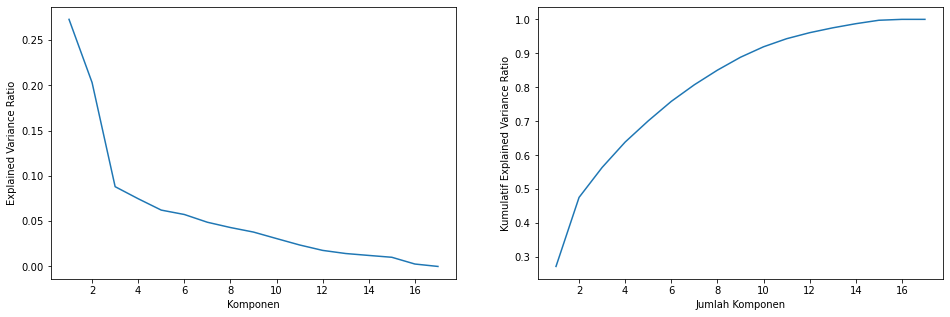

In [93]:
fig,ax=plt.subplots(ncols=2,figsize = (16,5))
ax[0].plot (range(1,18), pca_scaled.explained_variance_ratio_)
ax[0].set_xlabel ('Komponen')
ax[0].set_ylabel ('Explained Variance Ratio')

ax[1].plot (range(1,18), np.cumsum(pca_scaled.explained_variance_ratio_))
ax[1].set_xlabel ('Jumlah Komponen')
ax[1].set_ylabel ('Kumulatif Explained Variance Ratio')


Berdasarkan plotting diatas, maka menggunakan elbow method didapatkan bahwa jumlah komponen/dimensi yang terpilih adalah 3

In [94]:
pca3 = PCA(n_components=3)
pcadf = pca3.fit_transform(dfscaled)
pcadf = pd.DataFrame(pcadf)
pcadf.columns = ['PC1','PC2','PC3']

pcadf.head()

,PC1,PC2,PC3
0,-1.68365,-1.07224,0.47561
1,-1.13409,2.50914,0.60194
2,0.96940,-0.38357,0.09108
3,-0.88822,0.00465,1.49968
4,-1.60002,-0.68379,0.34793


## vii. Pendefinisian Model
Model yang digunakan untuk clustering adalah K Means

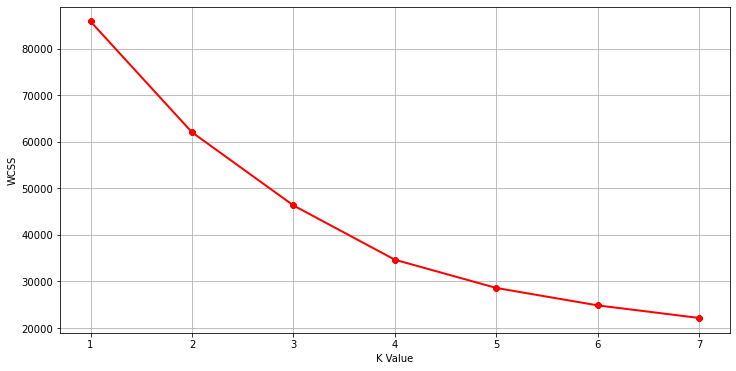

In [95]:
#Definisi model K Means dengan menggunakan data PCA

wcss = []
for k in range(1,8):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(pcadf)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,8),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,8,1))
plt.ylabel("WCSS")
plt.show()

Dari grafik diatas, kami mengambil elbow method 4 untuk jumlah kluster. 

In [96]:
#Training model k means
kmean= KMeans(4)
kmean.fit(pcadf)
labels=kmean.labels_

In [97]:
#Input hasil clustering kedalam database awal
clusters=pd.concat([df_cleaned
, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.90075,0.81818,95.40000,0.00000,95.40000,0.00000,0.16667,0.00000,0.08333,0.00000,0,2,1000.00000,201.80208,139.50979,0.00000,12,0
1,3202.46742,0.90909,0.00000,0.00000,0.00000,6442.94548,0.00000,0.00000,0.00000,0.25000,4,0,7000.00000,4103.03260,1072.34022,0.22222,12,2
2,2495.14886,1.00000,773.17000,773.17000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0,12,7500.00000,622.06674,627.28479,0.00000,12,3
3,1666.67054,0.63636,1499.00000,1499.00000,0.00000,205.78802,0.08333,0.08333,0.00000,0.08333,1,1,7500.00000,0.00000,312.34395,0.00000,12,0
4,817.71434,1.00000,16.00000,16.00000,0.00000,0.00000,0.08333,0.08333,0.00000,0.00000,0,1,1200.00000,678.33476,244.79124,0.00000,12,0


## vii. Evaluasi Model

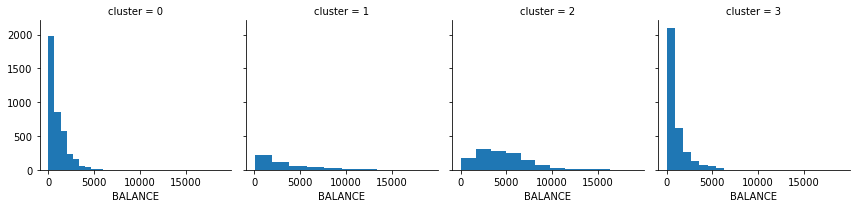

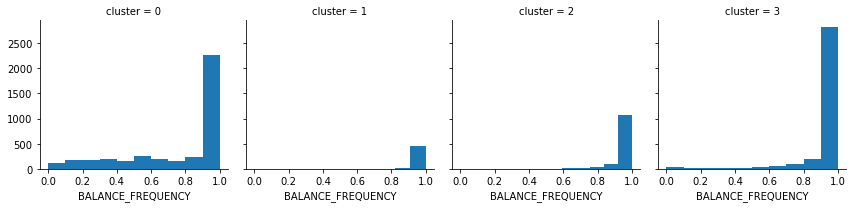

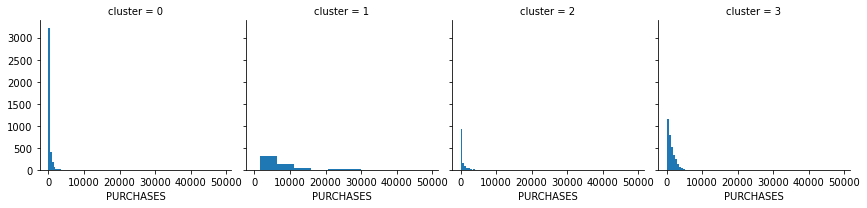

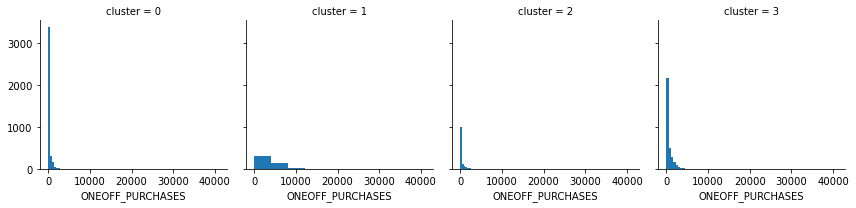

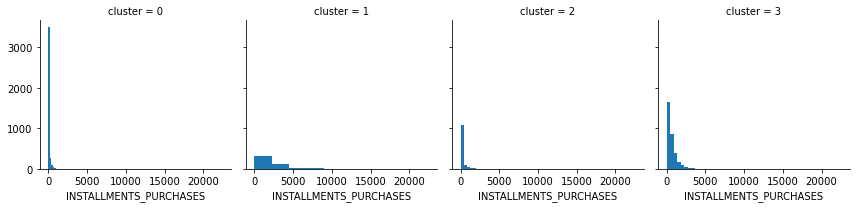

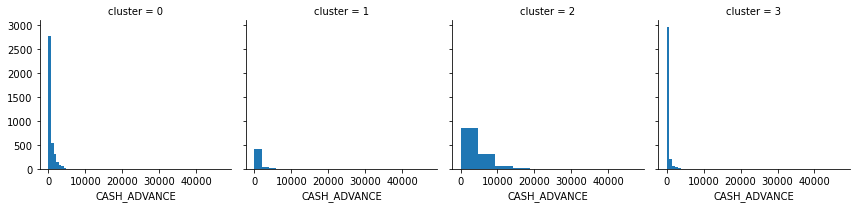

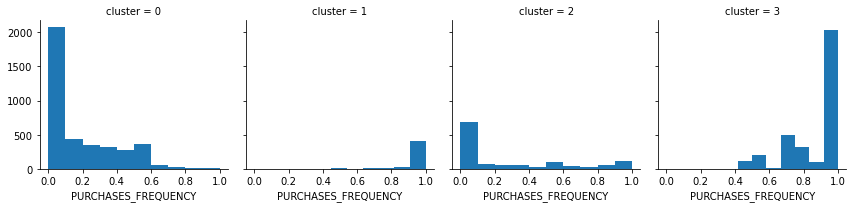

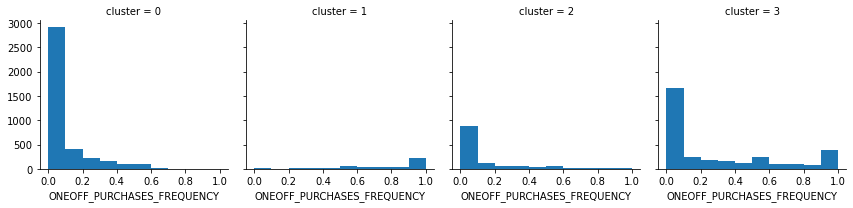

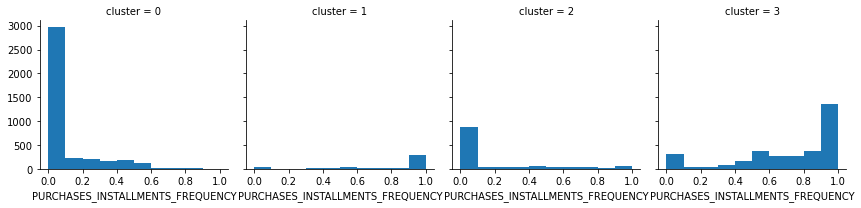

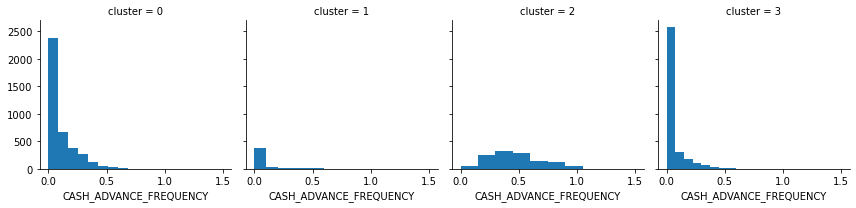

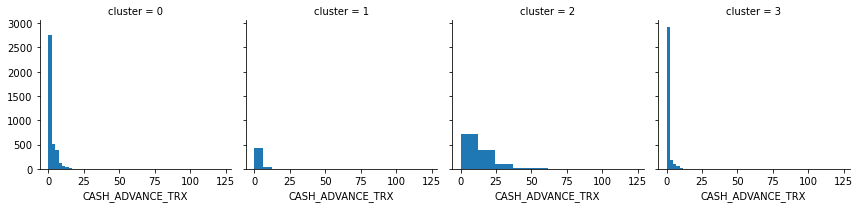

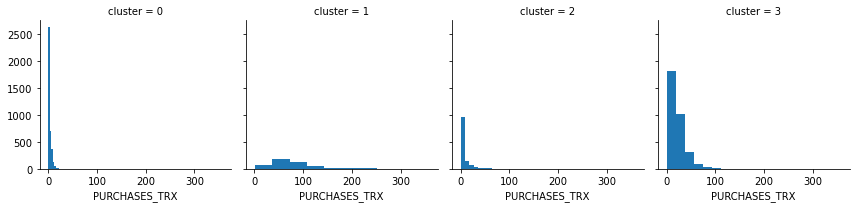

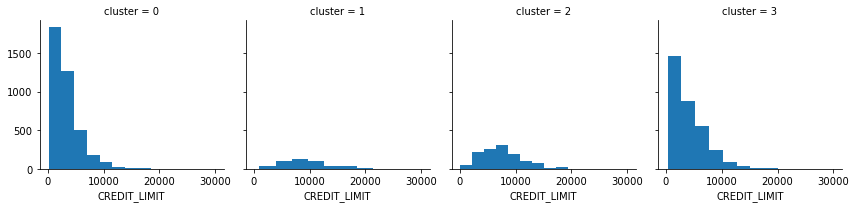

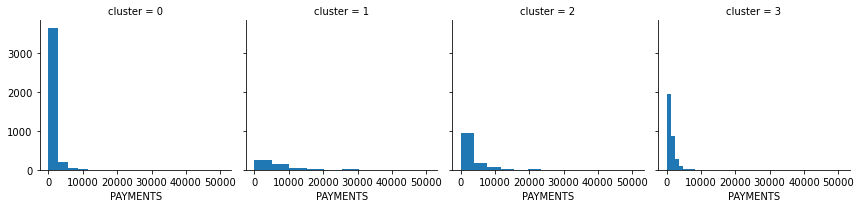

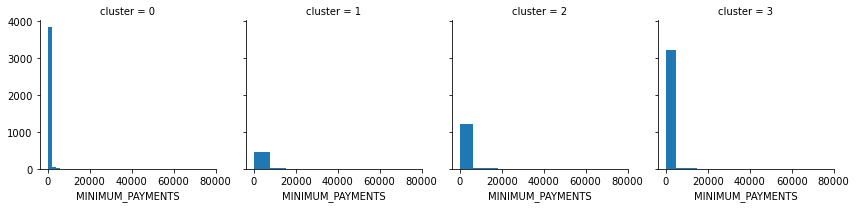

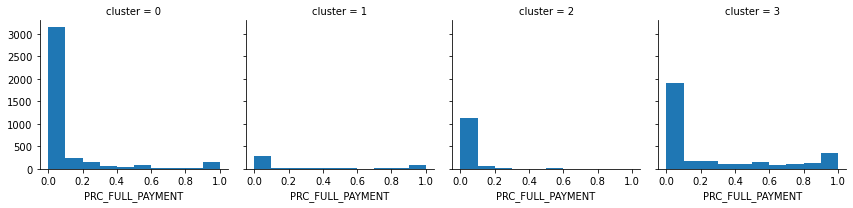

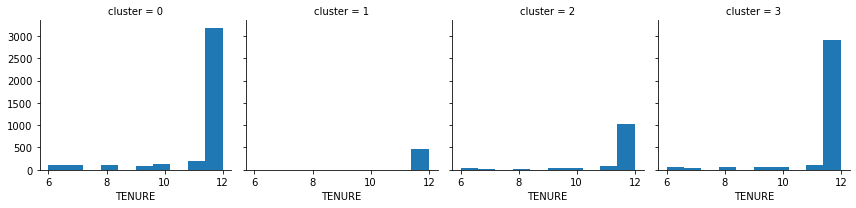

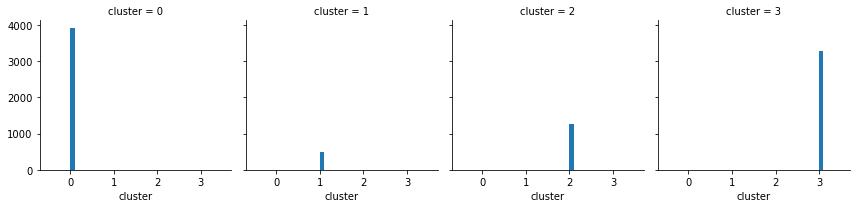

In [98]:
#Plotting hasil clustering terhadap masing-masing parameter
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [99]:
cls0 = clusters[clusters['cluster']==0]
cls1 = clusters[clusters['cluster']==1]
cls2 = clusters[clusters['cluster']==2]
cls3 = clusters[clusters['cluster']==3]

In [100]:
cls0.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000,3925.00000
mean,927.82361,0.77727,268.94541,208.87292,60.34298,579.61865,0.17815,0.08764,0.08621,0.11206,2.07134,2.94268,3260.87983,950.75301,466.55201,0.09223,11.39236,0.00000
std,1013.96437,0.29757,460.45132,446.32782,146.00896,909.00780,0.19899,0.13853,0.16045,0.13607,2.96101,3.84823,2678.85552,1507.42107,857.54134,0.22702,1.48607,0.00000
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,150.00000,0.00000,0.01916,0.00000,6.00000,0.00000
25%,64.32988,0.54546,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1500.00000,263.83929,148.76337,0.00000,12.00000,0.00000
50%,651.55986,1.00000,83.31000,0.00000,0.00000,101.18389,0.08333,0.00000,0.00000,0.08333,1.00000,1.00000,2500.00000,520.59814,285.88489,0.00000,12.00000,0.00000
75%,1420.15635,1.00000,340.00000,211.80000,54.00000,916.64405,0.33333,0.11111,0.08333,0.16667,3.00000,5.00000,4000.00000,1041.82556,493.39266,0.08333,12.00000,0.00000
max,6619.14864,1.00000,4900.00000,4900.00000,1859.34000,6897.96662,1.00000,1.00000,1.00000,0.85714,24.00000,31.00000,23000.00000,28988.97388,19443.45352,1.00000,12.00000,0.00000


Kluster 1 merupakan pemegang kartu kredit yang memiliki karakteristik: </br>
1. Memiliki balance dan credit limit yang rendah
2. Jarang melakukan purchasing/pembelanjaan

In [101]:
cls1.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000,484.00000
mean,3288.06096,0.98444,7089.90702,4771.02242,2320.12428,770.96829,0.94599,0.74824,0.77000,0.08142,2.32645,82.25000,9676.13636,6967.16365,1644.17396,0.31391,11.94008,1.00000
std,3261.29154,0.07066,5678.47523,5022.75454,2590.62251,2045.98614,0.13472,0.27837,0.32506,0.16464,6.33803,54.62746,4758.60708,6546.53763,4126.13308,0.40097,0.47996,0.00000
min,21.31195,0.09091,1567.25000,0.00000,0.00000,0.00000,0.08333,0.00000,0.00000,0.00000,0.00000,1.00000,1000.00000,0.00000,53.62807,0.00000,6.00000,1.00000
25%,737.35333,1.00000,4180.49000,2237.81000,694.48000,0.00000,1.00000,0.58333,0.58333,0.00000,0.00000,46.00000,6000.00000,3562.63144,229.69947,0.00000,12.00000,1.00000
50%,2287.19628,1.00000,5397.00000,3470.28500,1631.18500,0.00000,1.00000,0.83333,1.00000,0.00000,0.00000,70.50000,9000.00000,4923.00410,616.95906,0.08333,12.00000,1.00000
75%,4833.81946,1.00000,7985.47500,5754.16000,2911.03500,397.88426,1.00000,1.00000,1.00000,0.08333,1.00000,102.25000,12000.00000,8124.82313,1730.08908,0.75000,12.00000,1.00000
max,19043.13856,1.00000,49039.57000,40761.25000,22500.00000,19513.47483,1.00000,1.00000,1.00000,1.00000,62.00000,358.00000,30000.00000,50721.48336,76406.20752,1.00000,12.00000,1.00000


Kluster 1 merupakan pemegang kartu kredit yang memiliki karakteristik: </br>
1. Memiliki balance dan credit limit yang tinggi
2. Jarang melakukan purchasing/pembelanjaan

In [102]:
cls2.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000,1260.00000
mean,4545.24328,0.97126,454.11140,289.22781,164.96429,4333.70313,0.26735,0.12851,0.16887,0.47196,13.72222,6.72778,7387.38456,3324.80650,2100.49566,0.03098,11.43175,2.00000
std,2699.03310,0.08554,789.28493,598.59598,398.30732,3587.79067,0.34383,0.21819,0.29737,0.23001,12.14261,12.04696,3707.70280,4089.23530,4081.88008,0.09676,1.41341,0.00000
min,78.11458,0.18182,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,50.00000,0.00000,16.95009,0.00000,6.00000,2.00000
25%,2510.67630,1.00000,0.00000,0.00000,0.00000,2164.21441,0.00000,0.00000,0.00000,0.32500,7.00000,0.00000,4500.00000,1141.54008,735.80367,0.00000,12.00000,2.00000
50%,4184.39649,1.00000,60.91000,0.00000,0.00000,3500.99573,0.08333,0.00000,0.00000,0.42857,11.00000,1.00000,7000.00000,1880.68249,1308.10335,0.00000,12.00000,2.00000
75%,6050.08125,1.00000,586.47250,285.30250,116.62500,5414.29314,0.50000,0.16667,0.25000,0.63636,17.00000,9.00000,9500.00000,3839.11057,2045.76819,0.00000,12.00000,2.00000
max,16304.88925,1.00000,5197.22000,4139.56000,4059.93000,47137.21176,1.00000,1.00000,1.00000,1.50000,123.00000,91.00000,21500.00000,39048.59762,61031.61860,1.00000,12.00000,2.00000


Kluster 2 merupakan pemegang kartu kredit yang memiliki karakteristik: </br>
1. Memiliki balance dan credit limit yang tinggi
2. Sering melakukan purchasing/pembelanjaan

In [103]:
cls3.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
count,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000,3281.00000
mean,927.13015,0.94500,1194.56786,551.32165,643.52760,198.80483,0.88226,0.28769,0.71255,0.04134,0.77141,21.88875,4094.33717,1285.75694,697.43804,0.25077,11.63731,3.00000
std,1219.04625,0.14834,974.68636,798.01746,627.96145,569.53030,0.15524,0.34799,0.31284,0.09682,2.00355,16.06707,3125.41737,1212.88011,2042.61839,0.34782,1.17551,0.00000
min,0.00000,0.00000,8.40000,0.00000,0.00000,0.00000,0.16667,0.00000,0.00000,0.00000,0.00000,0.00000,300.00000,0.00000,0.26198,0.00000,6.00000,3.00000
25%,88.24241,1.00000,441.00000,0.00000,225.00000,0.00000,0.75000,0.00000,0.50000,0.00000,0.00000,12.00000,1500.00000,459.16388,163.30874,0.00000,12.00000,3.00000
50%,372.72260,1.00000,883.94000,159.00000,451.41000,0.00000,1.00000,0.08333,0.83333,0.00000,0.00000,16.00000,3000.00000,922.71497,203.34047,0.00000,12.00000,3.00000
75%,1308.12802,1.00000,1703.23000,850.60000,865.80000,0.00000,1.00000,0.50000,1.00000,0.00000,0.00000,27.00000,6000.00000,1724.51942,592.44491,0.45454,12.00000,3.00000
max,8978.15632,1.00000,5744.03000,5497.04000,4538.84000,7894.57882,1.00000,1.00000,1.00000,0.75000,23.00000,186.00000,25000.00000,12020.18009,50260.75947,1.00000,12.00000,3.00000


Dari hasil kluster diatas, maka dapat diinterpretasikan bahwa terdapat 4 kluster yaitu:
1. Kluster 0  merupakan klien yang memiliki balance dan credit limit yang rendah, dan jarang untuk menggunakan kartu kreditnya untuk melakukan pembelanjaan
2. Kluster 1  merupakan klien yang memiliki balance dan credit limit yang tinggi, dan jarang untuk menggunakan kartu kreditnya untuk melakukan pembelanjaan
3. Kluster 2  merupakan klien yang memiliki balance dan credit limit yang tinggi, dan sering untuk menggunakan kartu kreditnya untuk melakukan pembelanjaan
4. Kluster 3  merupakan klien yang memiliki balance dan credit limit yang rendah, dan sering untuk menggunakan kartu kreditnya untuk melakukan pembelanjaan

In [104]:
#Mencari jumlah data pada masing-masing kluster
clusters['cluster'].value_counts()

0    3925
3    3281
2    1260
1     484
Name: cluster, dtype: int64

In [105]:
#Menggabungkan data cluster dengan data PCA
final = pd.concat([clusters,pcadf], axis = 1)
final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster,PC1,PC2,PC3
0,40.90075,0.81818,95.40000,0.00000,95.40000,0.00000,0.16667,0.00000,0.08333,0.00000,...,2,1000.00000,201.80208,139.50979,0.00000,12,0,-1.68365,-1.07224,0.47561
1,3202.46742,0.90909,0.00000,0.00000,0.00000,6442.94548,0.00000,0.00000,0.00000,0.25000,...,0,7000.00000,4103.03260,1072.34022,0.22222,12,2,-1.13409,2.50914,0.60194
2,2495.14886,1.00000,773.17000,773.17000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,...,12,7500.00000,622.06674,627.28479,0.00000,12,3,0.96940,-0.38357,0.09108
3,1666.67054,0.63636,1499.00000,1499.00000,0.00000,205.78802,0.08333,0.08333,0.00000,0.08333,...,1,7500.00000,0.00000,312.34395,0.00000,12,0,-0.88822,0.00465,1.49968
4,817.71434,1.00000,16.00000,16.00000,0.00000,0.00000,0.08333,0.08333,0.00000,0.00000,...,1,1200.00000,678.33476,244.79124,0.00000,12,0,-1.60002,-0.68379,0.34793


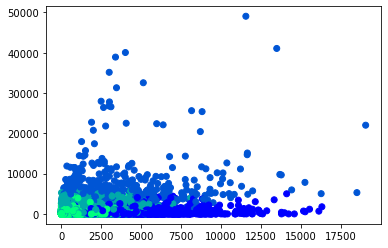

In [106]:
#Plotting terhadap variabel Balance dan Purchases
plt.scatter(final['BALANCE'], final['PURCHASES'],  
           c = KMeans(n_clusters = 4).fit_predict(pcadf), cmap =plt.cm.winter) 
plt.show() 

Dari hasil plotting terhadap variabel Balance dan Purchases, masih terlihat banyaknya data yang menumpuk satu sama lain nya.

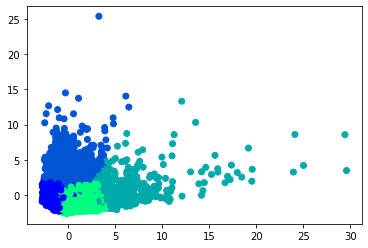

In [107]:
#Plotting terhadap variabel PCA
plt.scatter(final['PC1'], final['PC2'],  
           c = KMeans(n_clusters = 4).fit_predict(pcadf), cmap =plt.cm.winter) 
plt.show() 

Dari hasil plotting terhadap variabel PC1 dan PC2, sudah terlihat adanya pemisahan data pada masing-masing cluster

## Kesimpulan

1. Permodelan ditujukan untuk memperoleh customer segmentasi
2. Data yang digunakan adalah data penggunaan kartu kredit
3. Berdasarkan eksplorasi data didapatkan informasi bahwa:
    1. Semua variabel memiliki tipe data numerik
    2. Masih terdapat korelasi yang tinggi antara beberapa variabel
    3. Untuk variabel BALANCE memiliki nilai rata-rata 1564.47 dengan nilai BALANCE terbanyak adalah 0
    4. Untuk variabel PURCHASES memiliki nilai rata-rata 1003.20 dengan nilai PURCHASES terbanyak adalah 0
    5. Masih terdapat data outlier pada variabel BALANCE dan PURCHASES
4. Preprocessing yang dilakukan adalah data scaling dan dimensionality reduction
5. Dimensionality reduction dilakukan dengan metode PCA dan didapatkan 3 dimensi
6. Permodelan clustering dilakukan dengan menggunakan model K Means dengan menggunakan data PCA
7. Dari hasil klustering didapatkan 4 kluster yaitu:
    1. Kluster 0  merupakan klien yang memiliki balance dan credit limit yang rendah, dan jarang untuk menggunakan kartu kreditnya untuk melakukan pembelanjaan
    2. Kluster 1  merupakan klien yang memiliki balance dan credit limit yang tinggi, dan jarang untuk menggunakan kartu kreditnya untuk melakukan pembelanjaan
    3. Kluster 2  merupakan klien yang memiliki balance dan credit limit yang tinggi, dan sering untuk menggunakan kartu kreditnya untuk melakukan pembelanjaan
    4. Kluster 3  merupakan klien yang memiliki balance dan credit limit yang rendah, dan sering untuk menggunakan kartu kreditnya untuk melakukan pembelanjaan
8. Jumlah data pada masing-masing kluster adalah:
    1. Kluster 0 memiliki 3931 data
    2. Kluster 1 memiliki 1263 data
    3. Kluster 2 memiliki 482 data
    4. Kluster 3 memiliki 3274 data